In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../raw_data/full_statcast.csv')

In [3]:

# filter columns
columns = ['game_date', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'if_fielding_alignment', 'of_fielding_alignment',
       'stand', 'p_throws', 'home_team', 'away_team',
       'outs_when_up', 'inning', 'inning_topbot', 'at_bat_number',
       'home_score', 'away_score']
filtered = df[columns]
filtered = filtered.drop_duplicates()
print(df.columns)
filtered


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

,game_date,player_name,batter,pitcher,events,description,if_fielding_alignment,of_fielding_alignment,stand,p_throws,home_team,away_team,outs_when_up,inning,inning_topbot,at_bat_number,home_score,away_score
0,2022-04-27,"Mayers, Mike",642708,594577,force_out,hit_into_play,Standard,Standard,R,R,LAA,CLE,2,9,Top,79,9,5
1,2022-04-27,"Mayers, Mike",664702,594577,sac_fly,hit_into_play,Standard,Standard,R,R,LAA,CLE,1,9,Top,78,9,4
2,2022-04-27,"Mayers, Mike",664702,594577,NaN,foul,Standard,Standard,R,R,LAA,CLE,1,9,Top,78,9,4
3,2022-04-27,"Mayers, Mike",664702,594577,NaN,called_strike,Standard,Standard,R,R,LAA,CLE,1,9,Top,78,9,4
4,2022-04-27,"Mayers, Mike",665926,594577,single,hit_into_play,Infield shift,Standard,L,R,LAA,CLE,1,9,Top,77,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161515,2022-07-21,"López, Pablo",543760,641154,NaN,called_strike,Infield shift,Standard,R,R,MIA,TEX,1,1,Top,2,0,0
161516,2022-07-21,"López, Pablo",669701,641154,strikeout,called_strike,Standard,Standard,L,R,MIA,TEX,0,1,Top,1,0,0
161517,2022-07-21,"López, Pablo",669701,641154,NaN,foul,Standard,Standard,L,R,MIA,TEX,0,1,Top,1,0,0
161520,2022-07-21,"López, Pablo",669701,641154,NaN,called_strike,Standard,Standard,L,R,MIA,TEX,0,1,Top,1,0,0


In [7]:
filtered = filtered.dropna()

In [8]:
filtered.to_csv('../data/shifts.csv', index = 0)
filtered

,game_date,player_name,batter,pitcher,events,description,if_fielding_alignment,of_fielding_alignment,stand,p_throws,home_team,away_team,outs_when_up,inning,inning_topbot,at_bat_number,home_score,away_score
0,2022-04-27,"Mayers, Mike",642708,594577,force_out,hit_into_play,Standard,Standard,R,R,LAA,CLE,2,9,Top,79,9,5
1,2022-04-27,"Mayers, Mike",664702,594577,sac_fly,hit_into_play,Standard,Standard,R,R,LAA,CLE,1,9,Top,78,9,4
4,2022-04-27,"Mayers, Mike",665926,594577,single,hit_into_play,Infield shift,Standard,L,R,LAA,CLE,1,9,Top,77,9,4
8,2022-04-27,"Mayers, Mike",571912,594577,double,hit_into_play,Standard,Standard,R,R,LAA,CLE,1,9,Top,76,9,4
10,2022-04-27,"Mayers, Mike",680700,594577,field_out,hit_into_play,Infield shift,Standard,L,R,LAA,CLE,0,9,Top,75,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161498,2022-07-21,"Gray, Jon",621563,592351,single,hit_into_play,Standard,Standard,L,R,MIA,TEX,0,1,Bot,5,0,0
161503,2022-07-21,"López, Pablo",641680,641154,field_out,hit_into_play,Infield shift,Standard,L,R,MIA,TEX,2,1,Top,4,0,0
161508,2022-07-21,"López, Pablo",663993,641154,strikeout,called_strike,Infield shift,Standard,L,R,MIA,TEX,1,1,Top,3,0,0
161511,2022-07-21,"López, Pablo",543760,641154,walk,ball,Infield shift,Standard,R,R,MIA,TEX,1,1,Top,2,0,0


# Hypothesis 8: More shifts in end of season

,of_fielding_alignment,game_date
0,4th outfielder,105
1,Standard,38840
2,Strategic,2385


/Users/arrianadaniels/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


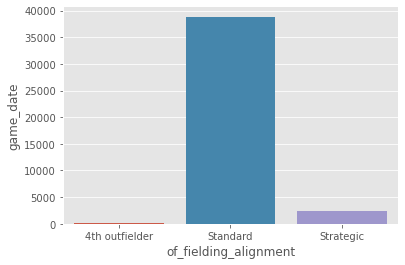

In [9]:
# Outfield
grouped_shifts = filtered.groupby(['of_fielding_alignment']).count()['game_date'].reset_index()
display(grouped_shifts)
sns.barplot(grouped_shifts.of_fielding_alignment, grouped_shifts.game_date)
plt.show()

,if_fielding_alignment,game_date
0,Infield shift,56101
1,Standard,91460
2,Strategic,13665


/Users/arrianadaniels/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


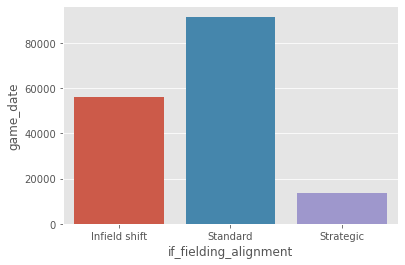

In [10]:
# infield
grouped_shifts = df.groupby(['if_fielding_alignment']).count()['game_date'].reset_index()
display(grouped_shifts)
sns.barplot(grouped_shifts.if_fielding_alignment, grouped_shifts.game_date)
plt.show()